# 載入套件及資料集

In [1]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

# 資料前處理 (Data Preprocessing)

## 讀取 CIFAR 10 資料集

In [2]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# Load CIFAR 10
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

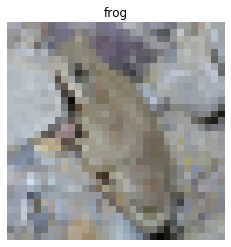

In [4]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('off');

# 建立用於分類 CIFAR 10 的卷積神經網路
## LeNet-5 分成兩個部分，分別為卷積層與全連接層，兩部份之間是透過扁平層 (Flatten) ，將卷積層最後輸出的 2 維向量壓扁成 1 維向量。

## 此處改變參數32,64,128

In [5]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(MaxPool2D())

# Second convolutional block
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D())

# Third convolutional block
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(GlobalAveragePooling2D())

# Fully-connected layers as a classfier
model.add(Dense(units=256, activation='relu'))

# Ouput layer: # of neurons = # of classes with softmax activation
model.add(Dense(units=10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               3

# 設定模型訓練時的設定

In [7]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['categorical_accuracy'])

# 訓練模型: 透過訓練來學習分類資料的函數

In [8]:
model.fit(X_train, y_train, 
          batch_size=128, 
          epochs=3,
          validation_data=(X_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.8640 - categorical_accuracy: 0.2939 - val_loss: 1.6685 - val_categorical_accuracy: 0.3710
Epoch 2/3
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.5683 - categorical_accuracy: 0.4184 - val_loss: 1.5267 - val_categorical_accuracy: 0.4349
Epoch 3/3
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.4151 - categorical_accuracy: 0.4804 - val_loss: 1.3319 - val_categorical_accuracy: 0.5093


## save model

In [9]:
model.save_weights('LeNet5_CIFAR10.h5')

# 預測資料集的準確率

In [10]:
model.load_weights('LeNet5_CIFAR10.h5')

score_train = model.evaluate(X_train, y_train)
score_test = model.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

50000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train Accuracy: 51.13999843597412
Test Accuracy: 50.929999351501465


In [11]:
model.layers

# Transfer learning

In [ ]:
# Load CIFAR 100
(U_train, v_train0), (U_test, v_test0) = datasets.cifar100.load_data()

# Normalize the range of featurs
U_train = U_train / U_train.max()
U_test = U_test / U_test.max()

# One-hot encoding
v_train = to_categorical(v_train0, 100)
v_test = to_categorical(v_test0, 100)

126623744/169001437 [=====================>........] - ETA: 43s

In [ ]:
# From LeNet-5 for CIFAR-10
CNN_layers
 
# New FC layers for CIFAR-100
FC_layers_CF100 = [Dense(units=256, activation='relu'),
                   Dense(units=128, activation='relu'),
                   Dense(units=100, activation='softmax')]